In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [13]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

In [14]:
from sklearn.linear_model import (
    LinearRegression,
)
lr = LinearRegression()
lr.fit(bos_X_train, bos_y_train)
lr.score(bos_X_test, bos_y_test)
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [15]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)
lr2.score(bos_sX_test, bos_sy_test)
lr2.intercept_
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

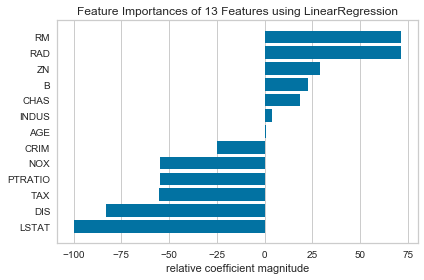

In [18]:
from yellowbrick.features import (
    FeatureImportances,
)
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(
    lr2, labels=bos_X.columns
)
fi_viz.fit(bos_sX, bos_y)
fi_viz.poof()
# #fig.savefig(
#     "images/mlpr_1401.png",
#     bbox_inches="tight",
#     dpi=300,
# )

In [19]:
from sklearn import datasets
from sklearn.linear_model import (
    LinearRegression,
)
iris = datasets.load_iris()
iX = iris.data
iy = iris.target
lr2 = LinearRegression()
lr2.fit(iX, iy)
list(zip(iris.feature_names, lr2.coef_))

[('sepal length (cm)', -0.11190585392686271),
 ('sepal width (cm)', -0.04007948649493384),
 ('petal length (cm)', 0.2286450272421231),
 ('petal width (cm)', 0.6092520541197894)]

In [20]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(bos_sX_train, bos_sy_train)
svr.score(bos_sX_test, bos_sy_test)

/Users/matt/.env/364/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6553772022206867

In [21]:
from sklearn.neighbors import (
    KNeighborsRegressor,
)
knr = KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592417

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(bos_X_train, bos_y_train)
dtr.score(bos_X_test, bos_y_test)

0.8559207694719114

In [25]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(
    dtr,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
#g.write_png("images/mlpr_1402.png")

In [27]:
dot_data = StringIO()
export_graphviz(
    dtr,
    max_depth=2,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
#g.write_png("images/mlpr_1403.png")

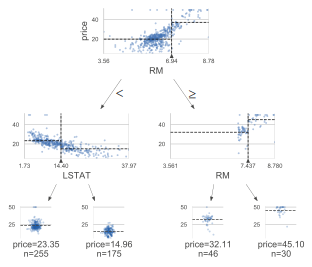

In [29]:
import dtreeviz.trees
dtr3 = DecisionTreeRegressor(max_depth=2)
dtr3.fit(bos_X_train, bos_y_train)
viz = dtreeviz.trees.dtreeviz(
    dtr3,
    bos_X,
    bos_y,
    target_name="price",
    feature_names=bos_X.columns,
)
viz

In [30]:
for col, val in sorted(
    zip(
        bos_X.columns, dtr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.576
LSTAT          0.192
DIS            0.111
CRIM           0.035
NOX            0.029


In [31]:
from sklearn.ensemble import (
    RandomForestRegressor,
)
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)
rfr.score(bos_X_test, bos_y_test)

0.8721182042634867

In [32]:
for col, val in sorted(
    zip(
        bos_X.columns, rfr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.439
LSTAT          0.380
DIS            0.067
CRIM           0.032
PTRATIO        0.020


In [35]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(bos_X_train, bos_y_train)
xgr.score(bos_X_test, bos_y_test)
xgr.predict(bos_X.iloc[[0]])

array([27.013563], dtype=float32)

In [36]:
for col, val in sorted(
    zip(
        bos_X.columns, xgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

DIS            0.187
CRIM           0.137
RM             0.137
LSTAT          0.134
AGE            0.110


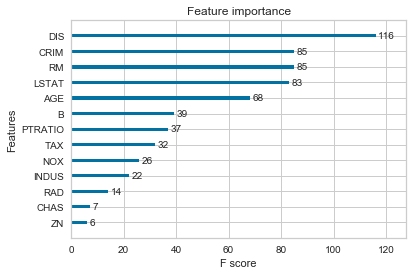

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax)
#fig.savefig("images/mlpr_1405.png", dpi=300)

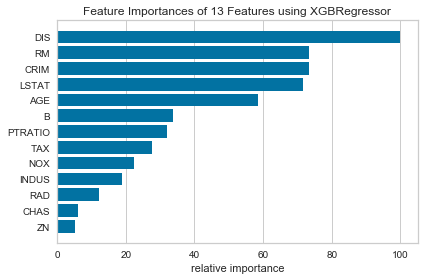

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(xgr)
fi_viz.fit(bos_X_train, bos_y_train)
fi_viz.poof()
#fig.savefig("images/mlpr_1406.png", dpi=300)

In [39]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[LSTAT<7.86499977] yes=1,no=2,missing=1
	1:[RM<7.43700027] yes=3,no=4,missing=3
		3:[RM<6.65649986] yes=7,no=8,missing=7
			7:leaf=2.42512202
			8:leaf=3.10899997
		4:[CRIM<2.74223518] yes=9,no=10,missing=9
			9:leaf=4.31652212
			10:leaf=1.07000005
	2:[LSTAT<16.0849991] yes=5,no=6,missing=5
		5:[B<47.7250023] yes=11,no=12,missing=11
			11:leaf=0.86499995
			12:leaf=2.11871624
		6:[DIS<1.94000006] yes=13,no=14,missing=13
			13:leaf=1.06833339
			14:leaf=1.57500005



In [40]:
import lightgbm as lgb
lgr = lgb.LGBMRegressor(random_state=42)
lgr.fit(bos_X_train, bos_y_train)
lgr.score(bos_X_test, bos_y_test)
lgr.predict(bos_X.iloc[[0]])

/Users/matt/.env/364/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


array([30.31689569])

In [41]:
for col, val in sorted(
    zip(
        bos_X.columns, lgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT        226.000
RM           199.000
DIS          172.000
AGE          130.000
B            121.000


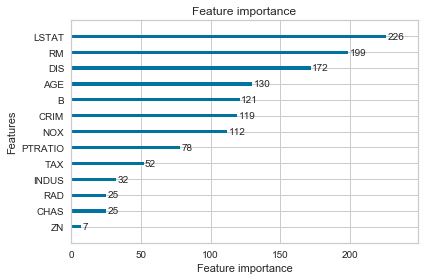

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgr, ax=ax)
fig.tight_layout()
#fig.savefig("images/mlpr_1408.png", dpi=300)